In [1]:
root_path = '/content/drive/MyDrive/프로그래머스 데브코스 데이터 분석/최종 프로젝트/airbnb-recruiting-new-user-bookings'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# df_bkts = pd.read_csv(root_path+'/age_gender_bkts.csv')
# df_countries = pd.read_csv(root_path+'/countries.csv')
# df_submission = pd.read_csv(root_path+'/sample_submission_NDF.csv')
df_sessions = pd.read_csv(root_path+'/sessions.csv')
# df_test = pd.read_csv(root_path+'/test_users.csv')
df_train = pd.read_csv(root_path+'/train_users_2.csv')

In [ ]:
df_sessions.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
df_sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [ ]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [ ]:
df_train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
df_train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


# 유저 데이터 탐색

In [ ]:
df_train[['signup_method']]

,signup_method
0,facebook
1,facebook
2,basic
3,facebook
4,basic
...,...
213446,basic
213447,basic
213448,basic
213449,basic


In [ ]:
df_train[['language']]

,language
0,en
1,en
2,en
3,en
4,en
...,...
213446,en
213447,en
213448,en
213449,en


In [ ]:
df_train[['affiliate_channel']]

,affiliate_channel
0,direct
1,seo
2,direct
3,direct
4,direct
...,...
213446,sem-brand
213447,direct
213448,direct
213449,other


In [ ]:
df_temp_1 = df_train[['date_account_created','timestamp_first_active','date_first_booking']]

,date_account_created,timestamp_first_active,date_first_booking
0,2010-06-28,20090319043255,NaN
1,2011-05-25,20090523174809,NaN
2,2010-09-28,20090609231247,2010-08-02
3,2011-12-05,20091031060129,2012-09-08
4,2010-09-14,20091208061105,2010-02-18
...,...,...,...
213446,2014-06-30,20140630235636,NaN
213447,2014-06-30,20140630235719,NaN
213448,2014-06-30,20140630235754,NaN
213449,2014-06-30,20140630235822,NaN


from matplotlib import pyplot as plt
_df_0['timestamp_first_active'].plot(kind='hist', bins=20, title='timestamp_first_active')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_account_created']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_account_created'}, axis=1)
              .sort_values('date_account_created', ascending=True))
  xs = counted['date_account_created']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date_account_created', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_account_created')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp_first_active']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp_first_active'}, axis=1)
              .sort_values('timestamp_first_active', ascending=True))
  xs = counted['timestamp_first_active']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('timestamp_first_active', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp_first_active')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_first_booking']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_first_booking'}, axis=1)
              .sort_values('date_first_booking', ascending=True))
  xs = counted['date_first_booking']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date_first_booking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_first_booking')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['timestamp_first_active'].plot(kind='line', figsize=(8, 4), title='timestamp_first_active')
plt.gca().spines[['top', 'right']].set_visible(False)

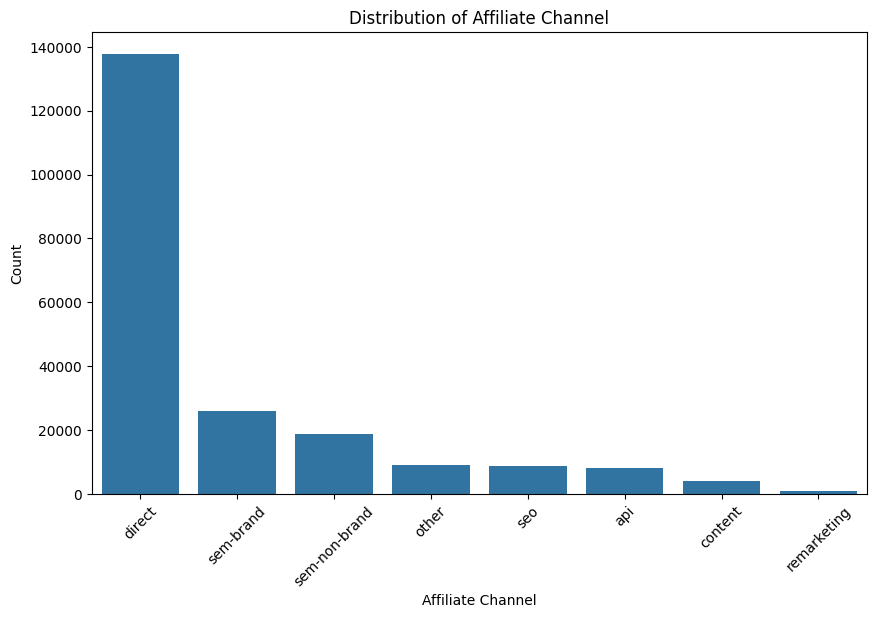

In [ ]:
# Visualizing the distribution of the 'affiliate_channel' column
plt.figure(figsize=(10, 6))
affiliate_channel_count = df_train['affiliate_channel'].value_counts()
sns.barplot(x=affiliate_channel_count.index, y=affiliate_channel_count.values)
plt.title('Distribution of Affiliate Channel')
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


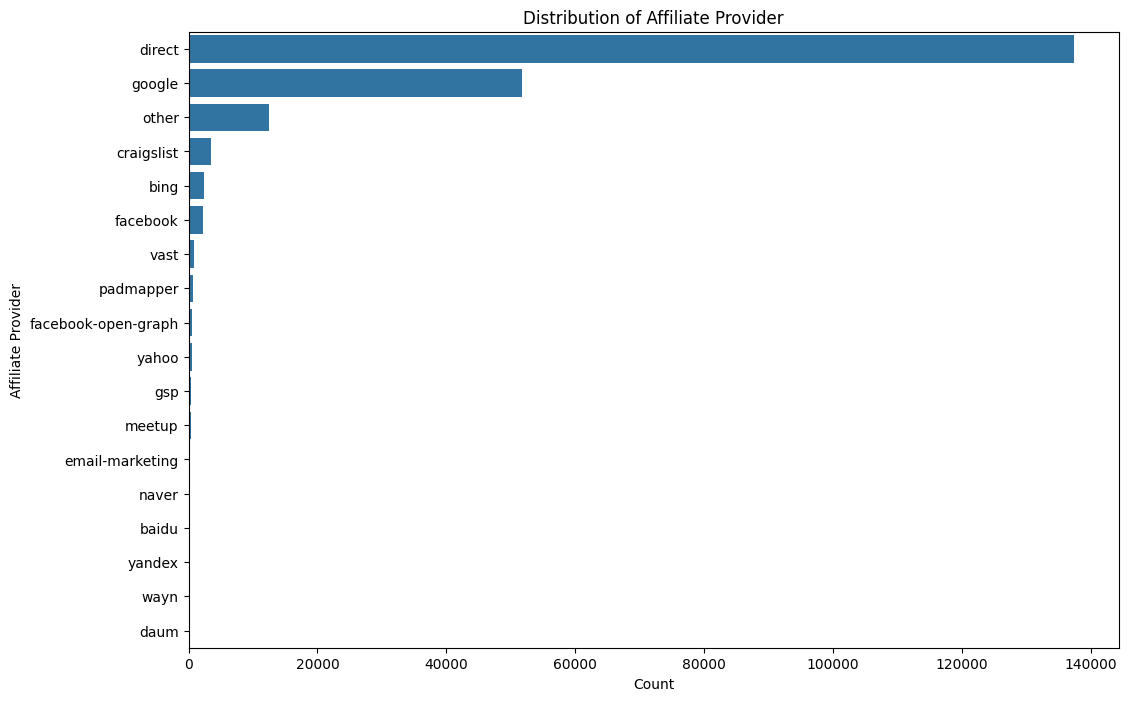

In [ ]:
# Visualizing the distribution of the 'affiliate_provider' column
plt.figure(figsize=(12, 8))
affiliate_provider_count = df_train['affiliate_provider'].value_counts()
sns.barplot(x=affiliate_provider_count.values, y=affiliate_provider_count.index)
plt.title('Distribution of Affiliate Provider')
plt.xlabel('Count')
plt.ylabel('Affiliate Provider')
plt.show()


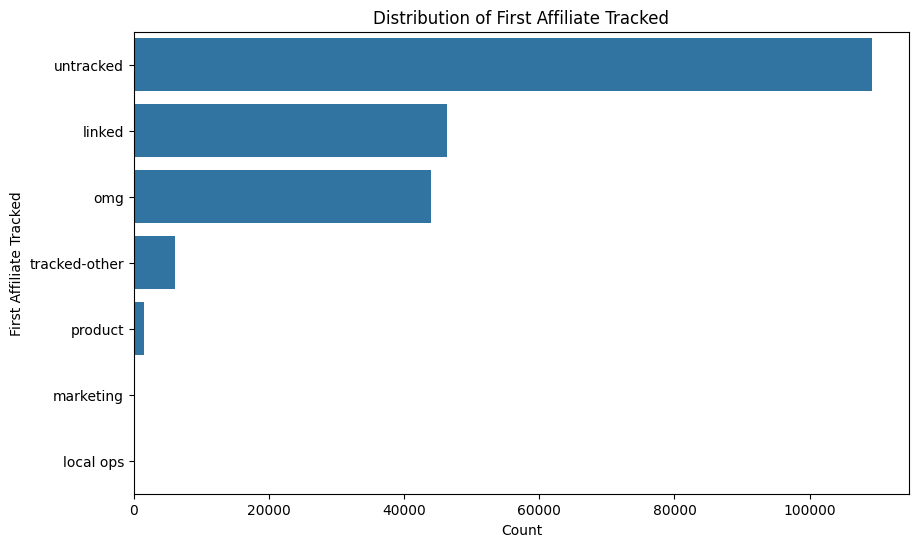

In [ ]:
# Visualizing the distribution of the 'first_affiliate_tracked' column
plt.figure(figsize=(10, 6))
first_affiliate_tracked_count = df_train['first_affiliate_tracked'].value_counts()
sns.barplot(x=first_affiliate_tracked_count.values, y=first_affiliate_tracked_count.index)
plt.title('Distribution of First Affiliate Tracked')
plt.xlabel('Count')
plt.ylabel('First Affiliate Tracked')
plt.show()


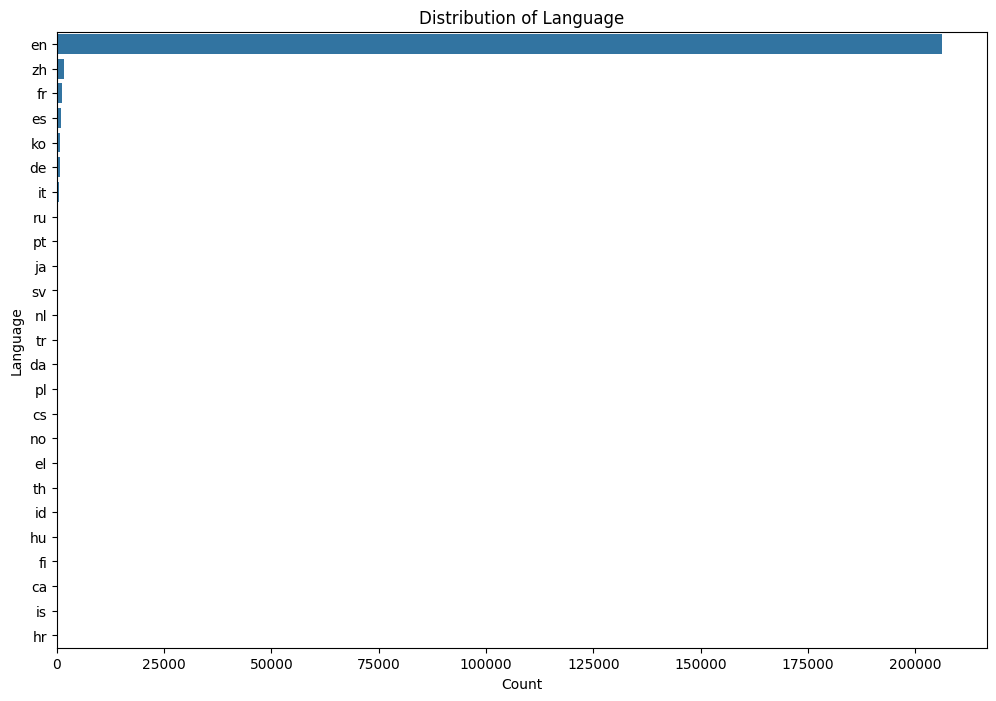

In [ ]:
# Visualizing the distribution of the 'language' column
plt.figure(figsize=(12, 8))
language_count = df_train['language'].value_counts()
sns.barplot(x=language_count.values, y=language_count.index)
plt.title('Distribution of Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


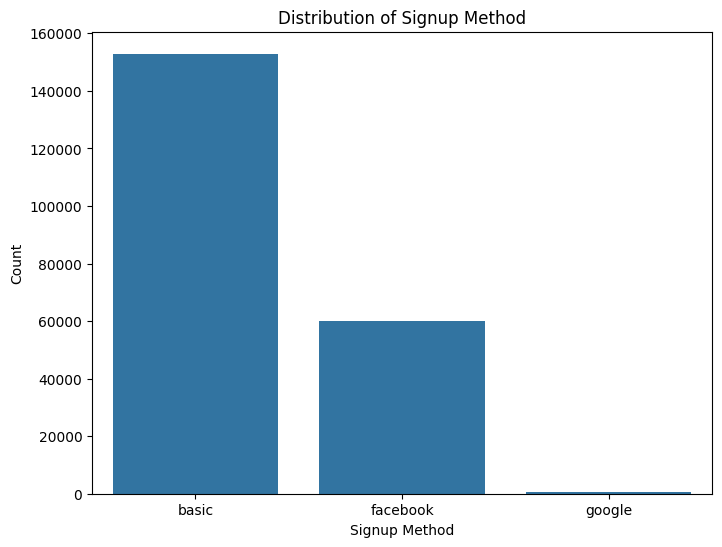

In [ ]:
# Visualizing the distribution of the 'signup_method' column
plt.figure(figsize=(8, 6))
signup_method_count = df_train['signup_method'].value_counts()
sns.barplot(x=signup_method_count.index, y=signup_method_count.values)
plt.title('Distribution of Signup Method')
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.show()


# 행동 관련 데이터 탐색

In [ ]:
df_temp_1 = df_train[['date_account_created','timestamp_first_active','date_first_booking']]
df_temp_1

,date_account_created,timestamp_first_active,date_first_booking
0,2010-06-28,20090319043255,NaN
1,2011-05-25,20090523174809,NaN
2,2010-09-28,20090609231247,2010-08-02
3,2011-12-05,20091031060129,2012-09-08
4,2010-09-14,20091208061105,2010-02-18
...,...,...,...
213446,2014-06-30,20140630235636,NaN
213447,2014-06-30,20140630235719,NaN
213448,2014-06-30,20140630235754,NaN
213449,2014-06-30,20140630235822,NaN


In [ ]:
df_temp_1['timestamp_first_active_new'] = df_temp_1['timestamp_first_active'].astype(str).str[0:4] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[4:6] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[6:8]
df_temp_1.drop('timestamp_first_active',inplace=True,axis=1)

<ipython-input-5-83e633c9a879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1['timestamp_first_active_new'] = df_temp_1['timestamp_first_active'].astype(str).str[0:4] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[4:6] + '-' + df_temp_1['timestamp_first_active'].astype(str).str[6:8]
<ipython-input-5-83e633c9a879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_1.drop('timestamp_first_active',inplace=True,axis=1)


In [ ]:
df_temp_1

,date_account_created,date_first_booking,timestamp_first_active_new
0,2010-06-28,NaN,2009-03-19
1,2011-05-25,NaN,2009-05-23
2,2010-09-28,2010-08-02,2009-06-09
3,2011-12-05,2012-09-08,2009-10-31
4,2010-09-14,2010-02-18,2009-12-08
...,...,...,...
213446,2014-06-30,NaN,2014-06-30
213447,2014-06-30,NaN,2014-06-30
213448,2014-06-30,NaN,2014-06-30
213449,2014-06-30,NaN,2014-06-30


Text(0, 0.5, 'Number of Accounts Created')

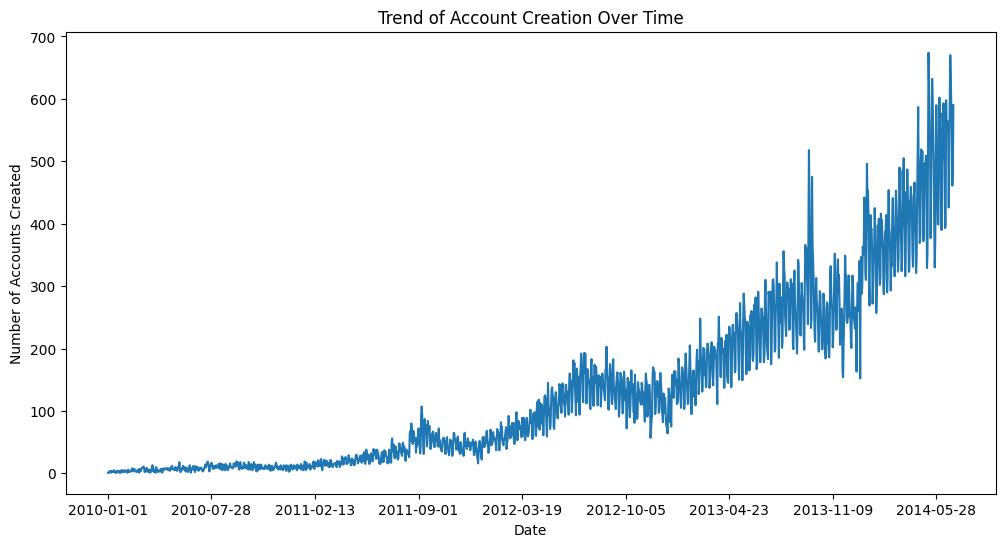

In [ ]:
plt.figure(figsize=(12, 6))
df_temp_1['date_account_created'].value_counts().sort_index().plot()
plt.title('Trend of Account Creation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')

# 새 섹션

In [ ]:
# df_merge = pd.merge(df1, df2, on='key', how='left', suffixes=('_left', '_right'))